<a href="https://colab.research.google.com/github/Vixuz144/Algoritmos-Geneticos/blob/main/CH3_DEAP_Framework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

DEAP: Distributed Evolutionary Algorithms in Python

Prrmero, se presenta el modulo *creator*, el cual sirve para crear clases. En el libro se nos presenta el siguiente ejemplo.

In [1]:
pip install deap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 3.7 MB/s eta 0:00:00


In [2]:
from deap import creator

In [3]:
class Employee():
  def __init__(self) -> None:
    pass

creator.create('Developer', Employee, position = 'Developer', porgramingLanguajes = set)

* El primer argumento es el nombre que deseamos asignar a la nueva clase, en este caso *'Developer'*.

* El segundo argumento es la clase de la cual será creado (clase padre/madre), para nuestro ejemplo será la clase *Employee*. **Nota:** Para esto, necesitamos primero crear la otra clase.

* Los siguientes argumentos serán añadidos como atributos de la clase que queremos crear.

In [4]:
print(creator.Developer)
print(Employee)

<class 'deap.creator.Developer'>
<class '__main__.Employee'>


Note que, la calse *Developer* esta dentro del modulo *creator*, con lo que debe ser referenciado como ***creator.Developer***

In [5]:
print(creator.Developer.position)
print(creator.Developer.porgramingLanguajes)

Developer
<class 'set'>


# Fiteness Class

Los puntajes, calificaciónes o aptitudes (fitness values) se encuentran dentro de la clase Fitness.


##Modulo ***base***

A partir de la clase *base.Fitness* crearemos nuestra estrategia para abordar el problema planteado. Para eelo hacemos uso de 'pesos' para definir el tipo de soluciones con respecto a los objetivos del problema (Objetivo simple, Multiobjetivo)

Por ejemplo:

In [6]:
from deap import base

In [7]:
creator.create("FitnessMax", base.Fitness, weights=(1.0,))

In [8]:
print(creator.FitnessMax)

<class 'deap.creator.FitnessMax'>


Esta clase *FitnessMax* con el atributo *weights* inicializado en $(1,)$ nos indica que la estrategia esta definida para un problema en donde se desea maximizar las aptitudes de un problema mono-objetivo. Por el contrario, si se desea una minimiación mono-objetivo de las aptitudes se escribe de la siguiente manera:

In [9]:
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))

In [10]:
print(creator.FitnessMin)

<class 'deap.creator.FitnessMin'>


De manera similar, se pueden tratar problemas multiobjetivos. En esta situación es donde entran en juego los "pesos"  que se les da a cada una de las estrategias, es decir, el peso que tienen en nuestro problema cada uno de los objetivos.

In [11]:
creator.create("FitnessCompound", base.Fitness, weights=(1.0, 0.2, -0.5))
print(creator.FitnessCompound)

<class 'deap.creator.FitnessCompound'>


Con estos pesos podemos indicar si deseamos maximizar o minimizar cada objetivo, además de clasificarlos según su importancia según la magnitud de la entrada.

##Los *values*

Para obtener los *values fitness* o aptitudes utilizamos una tupla llamada *values*, la cual contiene dichos puntajes. Esta tupla se encuentra dentro de la clase *base.Fitness*.

Estos valores se obtienen con la dunción comunmente nombrada *evaluate()*. Y los puntajes ponderados por sus pesos se almacenan en la tupla *wvalues*.

#Individuals Class

También usamos creator para definir los individuos de la población.

In [12]:
creator.create("Individual", list, fitness=creator.FitnessMax)

In [13]:
print(creator.Individual)
print(creator.Individual.fitness)

<class 'deap.creator.Individual'>
<class 'deap.creator.FitnessMax'>


En adición, para todas las instancias de los individuos necesitan tener como atributo la fitness function.

#Toolbox

*Toolbox* o caja de herramientas, como lo sugiere su nombre, es un contenedor de funciones u operadores, su función es permitirnos crear nuevos operadores a partir de los ya existentes.

Por ejemplo:

In [14]:
def suma(a,b):
  return a + b

In [15]:
toolbox = base.Toolbox()
toolbox.register('Incremento_5', suma, b = 5)

* La primera entrada de la función *register()* es el alias con el que nos queremos referir a nuestro nuevo operador.
* La segunda entrada es la función que queremos registrar.
* En las siguientes entradas (opcionales) son los valores que se le darán al operador de manera automática.

In [16]:
print(toolbox.Incremento_5(10))

15


#Operadores genéticos

Existe el módulo *tools* dentro de la librería DEAP, el cual viene con un conjunto de operaciones o funciones desarrolladas para el funcionamiento de los algoritmos evolutivos. Entre los cuales podemos ver algunas funciones de los operadores genéticos.

Con función *register()* del módulo *Toolbox* también podemos renombrar las funciones del módulo *tolls*. De manera que podamos usarlas con mayor facilidad y tenga una mayor legibilidad dentro de nuestro código al usarlas.

In [17]:
from deap import tools
toolbox.register("seleccion", tools.selTournament, tournsize=3)
toolbox.register("cruza", tools.cxTwoPoint)
toolbox.register("mutacion", tools.mutFlipBit, indpb=0.02)

Algunas de las funciones del modulo *tools* son:

$$\textrm{Operadores de selección}\left\{\begin{matrix} selRoulette() \\
selStochasticUniversalSampling() \\
selTournament() \end{matrix}\right.$$

$$\textrm{Operadores de selección}\left\{\begin{matrix} cxOnePoint() \\
cxUniform() \\
cxOrdered() \\
cxPartialyMatched() \end{matrix}\right.$$

$$\textrm{Operadores de selección}\left\{\begin{matrix} mutFlipBit() \\
mutGaussian() \end{matrix}\right.$$

#Población

Para generar la población inicial, se usa la función *initRepeat()* del modulo *tools*.

In [18]:
import random
randomList = tools.initRepeat(list, random.random, 30)
print(randomList)

[0.2398196372738507, 0.7755439137866087, 0.026385384941995715, 0.9066352242676265, 0.8189848549315555, 0.40206751686093156, 0.9530999629001332, 0.23405139216039872, 0.4845230301517448, 0.9896456822246137, 0.8550577218718661, 0.540369117822681, 0.719789621714124, 0.7357175399132498, 0.7195259669073336, 0.250534668294233, 0.19093723783819994, 0.6325410696789805, 0.9758985921561101, 0.29937415204648343, 0.8736187957542675, 0.9948962040706275, 0.4944237070276871, 0.024191495683052566, 0.3967168959543088, 0.5955442240692533, 0.10159527680445601, 0.5228353930816229, 0.36990492730731006, 0.3089804162588482]


* El primer argumento es el tipo de estructura en el que se desea almacenar la población, en este caso un *list*
* El segundo argumento indica que función se usará para generar la población, para este ejemplo es necesario importar primero la librería de donde se desea tomar el generador de números aleatorios.
* El tercer argumento indica el número de individuos de la población.

In [19]:
toolbox.register('CeroOUno', random.randint, 0, 1)
randomList = tools.initRepeat(tuple, toolbox.CeroOUno, 30)
print(randomList)

(1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0)


Usando lo ya aprendido, podemos crear un operador que nos genere 0s o 1s de manera aleatoria para nuestra población inicial.

#Aptitudes

Con el modulo *toolbos* registraremos nuestra fitness function o función objetivo con el nombre 'evaluate'.

In [20]:
def func(indiv):
  return sum(i for i in indiv)

# print(func([1,2,3]))

In [21]:
toolbox.register("evaluate", func)

#The OneMax Problem

Este simple problema de optimización siver como un "Hola Mundo" para los algoritmos genéticos. Se busca optimizar una cadena de texto binaria, es decir, constituida únicamene de ceros y unos. Para ello se busca maximizar la suma de los dígitos de esta cadena.

##Importar las librerias a utilizar

In [22]:
from deap import base
from deap import creator
from deap import tools

from random import randint, seed, random
import matplotlib.pyplot as plt
import seaborn as sns

##Configurar el algoritmo genético

Configuramos los datos iniciales, como constantes y la semilla del RNG.

In [23]:
Long_str = 100  #Longitud de la cadena de texto (Cantidad de 0s y 1s de cada individuo)

Tam_Pob = 200 # Tamaño de la población (cantidad de individuos)
p_cruza = 0.9 # Probabilidad de cruza
p_mut = 0.1   # Probabilidad de mutación
max_gen = 100  # Número máximo de generaciones (condición de paro)

seed(42) # Se establece la semilla inicial para la generación de números pseudo-aleatorios

Creamos y especificamos a los individuos y la estrategia del algoritmo.

In [24]:
tl = base.Toolbox()
tl.register("Ceros_Unos", randint, 0, 1)         # Generador de 0s y 1s
creator.create('Maximizar', base.Fitness, weights=(1,))         # Selección de estrategia
creator.create('Individual', list, fitness = creator.Maximizar)  # Indicamos como será un individuo

/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


Creamos un generador de un único individuo (función), con la especificación de los individuos, nuestro generador de 0s y 1s y con el tamaño adecuado de cada individuo.

In [25]:
tl.register("Generar_individuo", tools.initRepeat, creator.Individual, tl.Ceros_Unos, Long_str)

Ahora, con el generador de un único individuo, generamos la población inicial. Aunqeu aún no ingresamos el tamaño de la población.

In [26]:
tl.register('Generar_poblacion', tools.initRepeat, list, tl.Generar_individuo)

Creamos la función objetivo o *fitness function*

In [27]:
def F(ind):
  return sum(ind),

In [28]:
tl.register("evaluar", F)

Establecemos los operadores genéticos de selección, cruza y mutación.

In [29]:
tl.register('seleccion', tools.selTournament, tournsize = 3)
tl.register("cruza", tools.cxOnePoint)
tl.register('mutacion', tools.mutFlipBit, indpb = 1/Long_str)

##Iniciar el Algoritmo

In [30]:
Poblacion = tl.Generar_poblacion(n=Tam_Pob)
Cont_Gen = 0

In [31]:
Aptitudes = list(map(tl.evaluar, Poblacion))

for ind, ap in zip(Poblacion, Aptitudes):
  print(ind)
  print(ap)
  ind.fitness.values = ap

[0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1]
(44,)
[1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0]
(43,)
[0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0]
(45,)
[0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 

In [32]:
Aptitudes =[ind.fitness.values[0] for ind in Poblacion]

In [33]:
Aps_max = []
Aps_med = []
while max(Aptitudes)<Long_str and Cont_Gen < max_gen:
  Cont_Gen += 1
  Descendencia = tl.seleccion(Poblacion, len(Poblacion))
  Descendencia = list(map(tl.clone, Descendencia))

  for h1, h2 in zip(Descendencia[::2], Descendencia[1::2]):
    if random() < p_cruza:
        tl.cruza(h1,h2)
        del h1.fitness.values
        del h2.fitness.values

  for m in Descendencia:
    if random() < p_mut:
      tl.mutacion(m)
      del m.fitness.values

  Nuevos_individuos = [ind for ind in Descendencia if not ind.fitness.values]
  Nuevas_aptitudes = list(map(tl.evaluar,Nuevos_individuos))
  for ind, ap in zip(Nuevos_individuos, Nuevas_aptitudes):
    ind.fitness.values = ap

  Poblacion[:] = Descendencia
  Aptitudes = [ind.fitness.values[0] for ind in Poblacion]

  max_aptitud = max(Aptitudes)
  media_aptitud = sum(Aptitudes)/len(Poblacion)
  Aps_max.append(max_aptitud)
  Aps_med.append(media_aptitud)
  print("- Generación {}: Aptitud Máxima = {}, Aptidud Media = {}".format(Cont_Gen, max_aptitud, media_aptitud))

  mejor_indice = Aptitudes.index(max(Aptitudes))
  print("Mejor Individuo = ", *Poblacion[mejor_indice], "\n")

- Generación 1: Aptitud Máxima = 65.0, Aptidud Media = 53.575
Mejor Individuo =  1 1 0 1 0 1 0 0 1 0 0 0 1 1 1 0 1 0 0 1 0 1 0 0 0 1 1 1 1 1 0 1 1 1 1 0 1 0 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0 0 0 0 1 0 1 0 1 1 1 0 1 1 0 0 0 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 

- Generación 2: Aptitud Máxima = 66.0, Aptidud Media = 56.855
Mejor Individuo =  1 1 1 0 0 1 0 1 1 1 0 1 1 1 0 1 1 0 1 0 0 0 0 0 0 1 1 1 1 1 0 1 1 0 1 1 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0 0 0 0 1 0 1 0 1 1 1 0 1 1 0 0 0 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 

- Generación 3: Aptitud Máxima = 69.0, Aptidud Media = 59.42
Mejor Individuo =  1 0 1 1 1 0 1 0 1 1 1 1 1 0 0 1 0 1 0 1 1 1 0 0 0 0 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1 1 1 1 1 1 1 0 1 1 1 0 1 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 0 1 1 1 1 0 1 1 0 0 1 1 0 1 1 1 1 1 0 0 1 0 1 1 0 

- Generación 4: Aptitud Máxima = 70.0, Aptidud Media = 62.03
Mejor Individuo =  1 0 0 0 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 0 0 1 0 0 0 0 1 1 1 1 1 1 1 1 0 1 

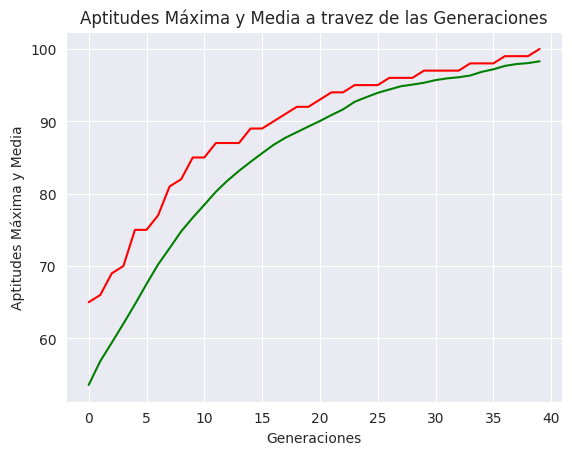

In [34]:
sns.set_style('darkgrid')
plt.plot(Aps_max, color='r')
plt.plot(Aps_med, 'g')
plt.xlabel('Generaciones')
plt.ylabel('Aptitudes Máxima y Media')
plt.title('Aptitudes Máxima y Media a travez de las Generaciones')
plt.show()

##